<a href="https://colab.research.google.com/github/Nvm-seff/Bayesian-Analysis-of-Iris-Dataset/blob/main/i210830_B_Stat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Saifullah Rizwan*
##*21i-0830*
###*B*


In [12]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Load the dataset
file_path = '/content/iris2.csv'
iris_df = pd.read_csv(file_path)
sepal_width = iris_df['sepal_width'].values

In [19]:
# Model 1: Normal prior for sepal_width
with pm.Model() as normal_model:
    mu = pm.Normal('mu', mu=np.mean(sepal_width), sigma=np.std(sepal_width))
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=sepal_width)
    normal_trace = pm.sample(1000, chains=2, tune=500, return_inferencedata=True, progressbar=False)

# Model 2: Student's-T prior for sepal_width
with pm.Model() as student_t_model:
    mu = pm.StudentT('mu', mu=np.mean(sepal_width), sigma=np.std(sepal_width), nu=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    likelihood = pm.StudentT('likelihood', mu=mu, sigma=sigma, nu=1, observed=sepal_width)
    student_t_trace = pm.sample(1000, chains=2, tune=500, return_inferencedata=True, progressbar=False)


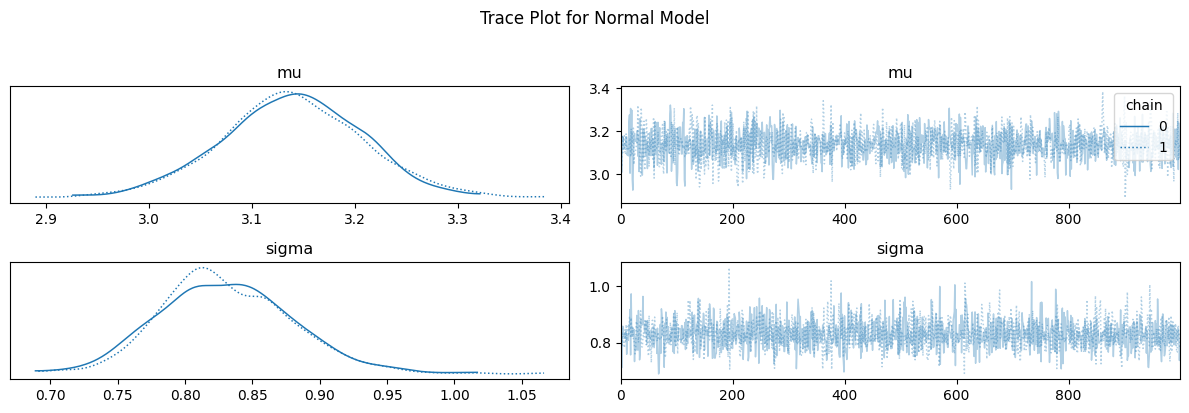

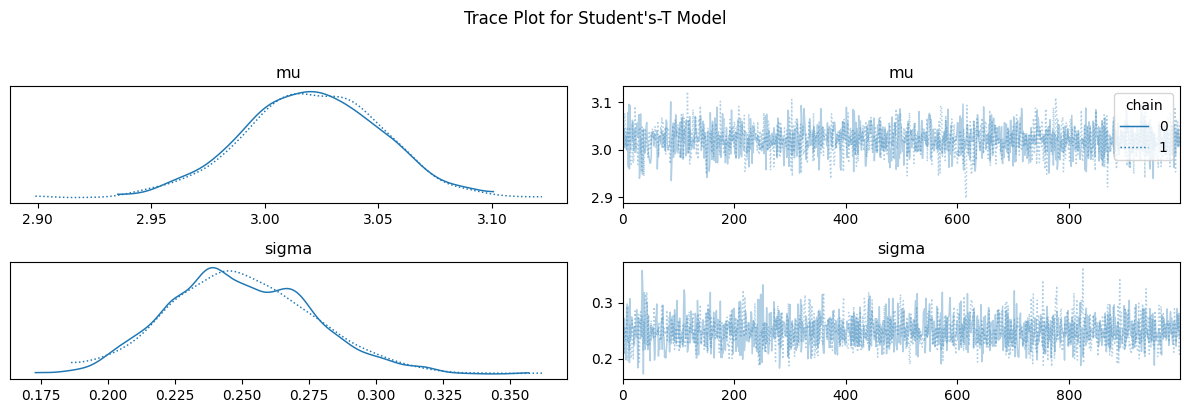

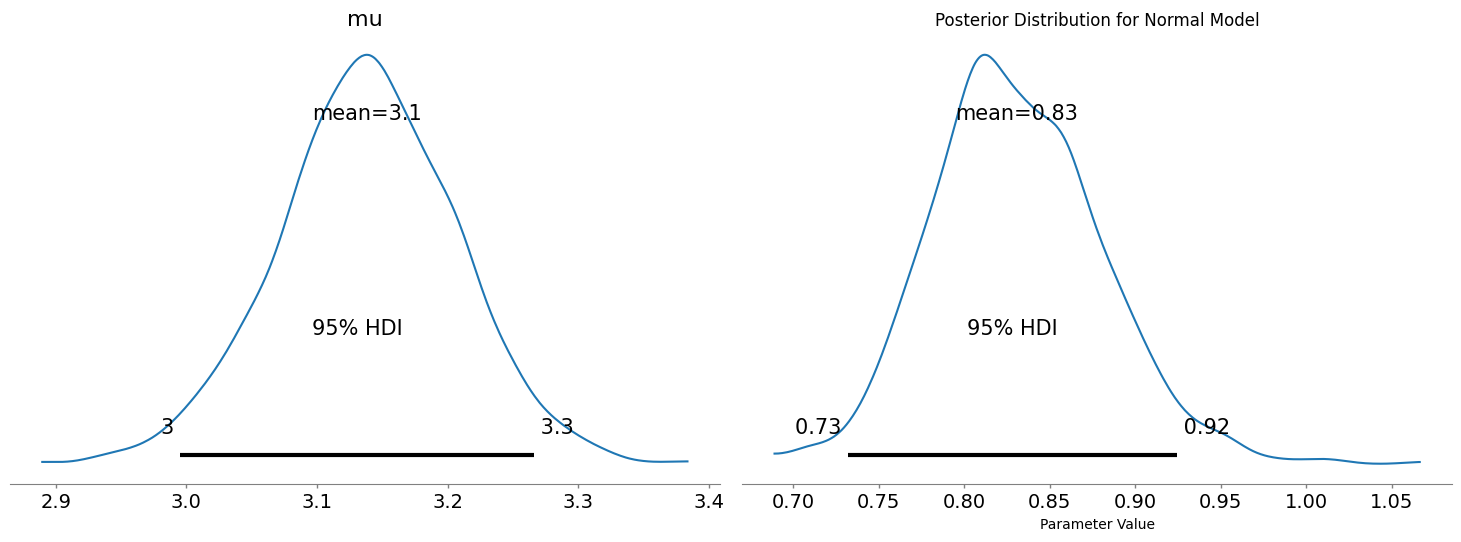

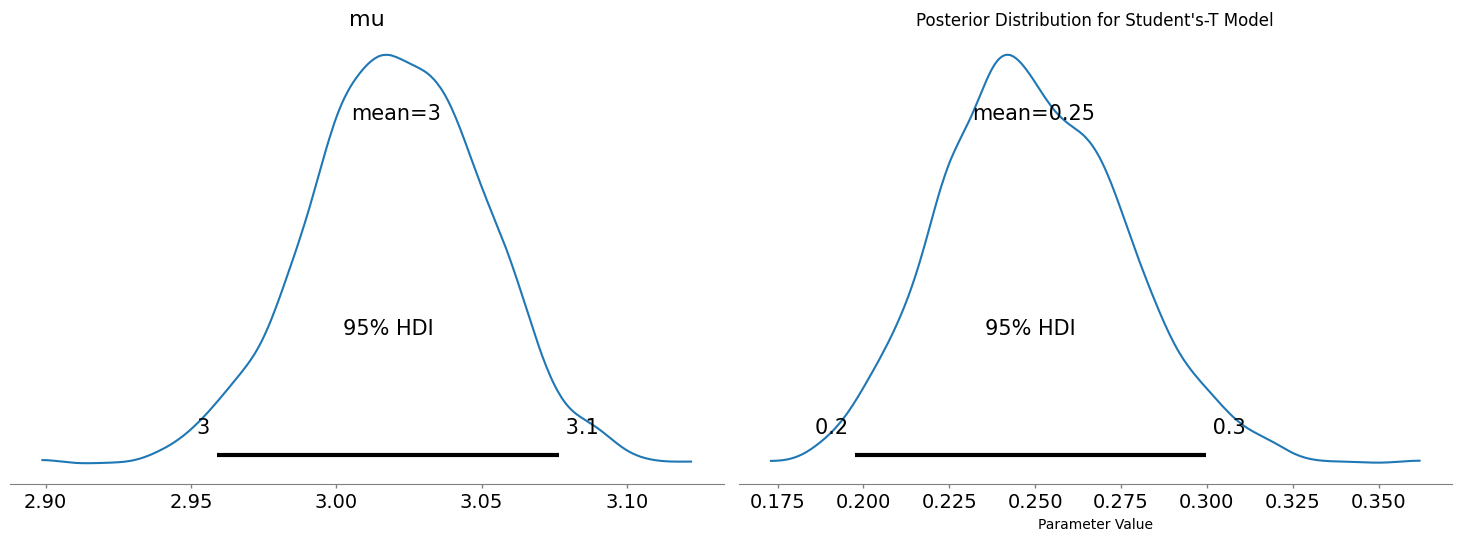

In [20]:
# Plotting trace for Normal model
az.plot_trace(normal_trace, var_names=['mu', 'sigma'], legend=True)
plt.suptitle('Trace Plot for Normal Model', y=1.02)
plt.tight_layout()
plt.show()

# Plotting trace for Student's-T model
az.plot_trace(student_t_trace, var_names=['mu', 'sigma'], legend=True)
plt.suptitle('Trace Plot for Student\'s-T Model', y=1.02)
plt.tight_layout()
plt.show()

# Posterior analysis for Normal model
az.plot_posterior(normal_trace, var_names=['mu', 'sigma'], hdi_prob=0.95)
plt.title('Posterior Distribution for Normal Model')
plt.xlabel('Parameter Value')
plt.tight_layout()
plt.show()

# Posterior analysis for Student's-T model
az.plot_posterior(student_t_trace, var_names=['mu', 'sigma'], hdi_prob=0.95)
plt.title('Posterior Distribution for Student\'s-T Model')
plt.xlabel('Parameter Value')
plt.tight_layout()
plt.show()

Based on the comparison of the posterior distributions, the Student's-T model shows broader distributions with heavier tails compared to the Normal model. This indicates that the Student's-T model is more robust, as it can accommodate potential outliers and greater variability in the data. Therefore, the Student's-T model is a better choice for estimating the mean of sepal_width in this dataset, as it is less sensitive to deviations from normality

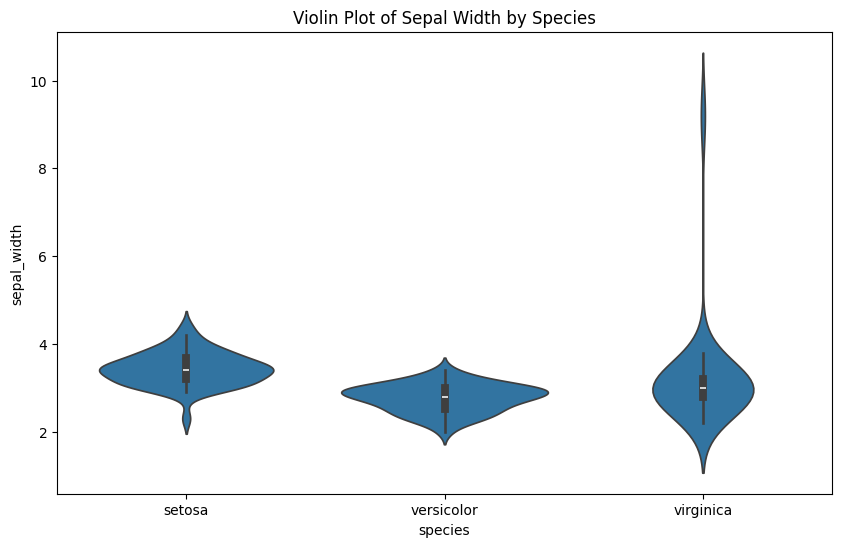

In [15]:
# Creating violin plots for 'sepal_width' by species
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris_df, x='species', y='sepal_width')
plt.title('Violin Plot of Sepal Width by Species')
plt.show()

# Dividing data into groups based on species
setosa = iris_df[iris_df['species'] == 'setosa']['sepal_width'].values
versicolor = iris_df[iris_df['species'] == 'versicolor']['sepal_width'].values
virginica = iris_df[iris_df['species'] == 'virginica']['sepal_width'].values

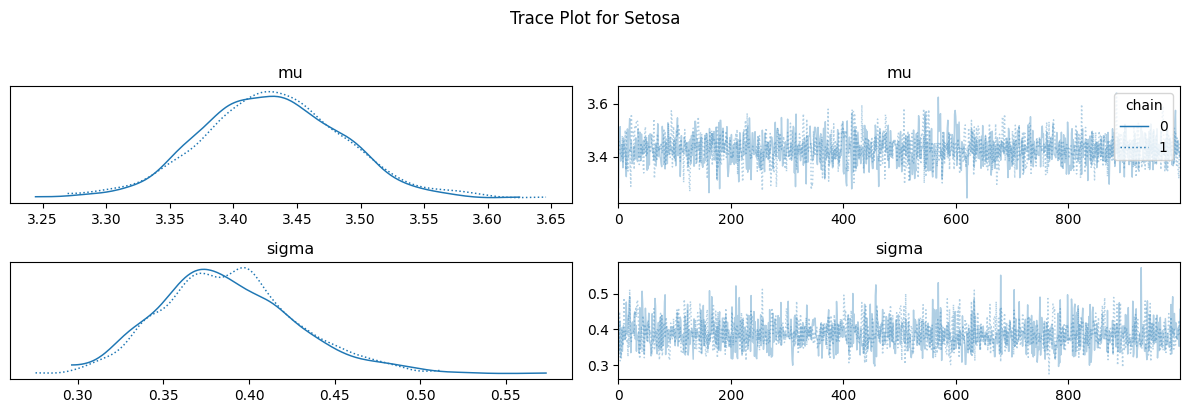

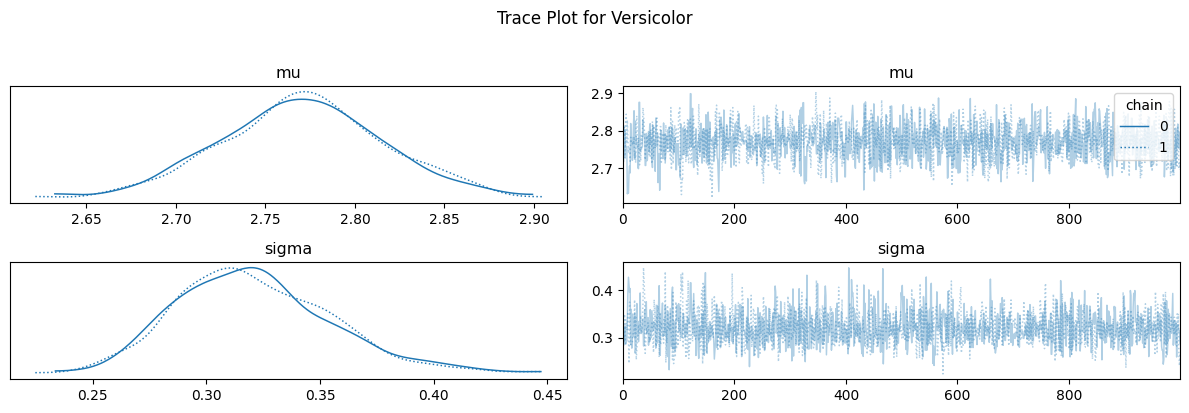

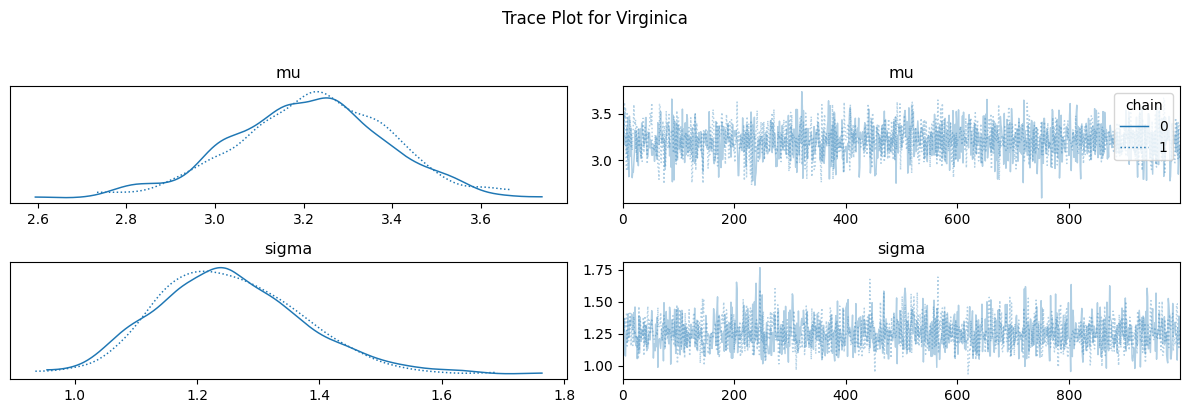

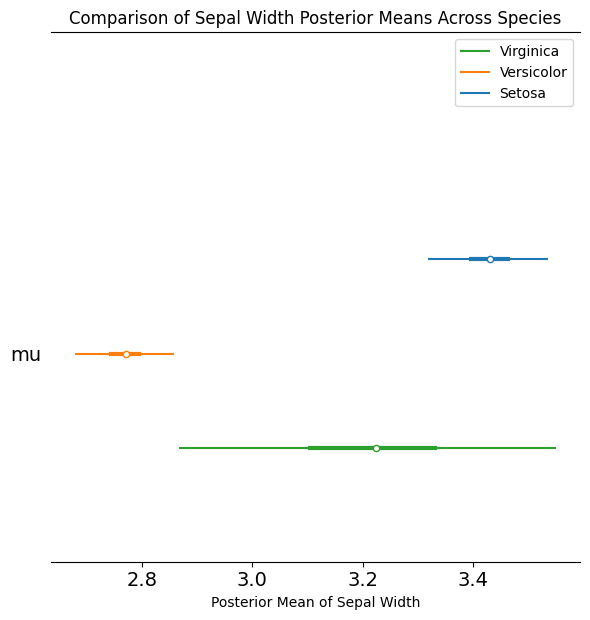

In [21]:
# Bayesian model for each group with better labeling
def bayesian_model(data, label):
    with pm.Model() as model:
        # Define priors
        mu = pm.Normal('mu', mu=np.mean(data), sigma=np.std(data))
        sigma = pm.HalfNormal('sigma', sigma=1)
        # Define likelihood
        likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=data)
        # Sample from the posterior
        trace = pm.sample(1000, chains=2, tune=500, return_inferencedata=True, progressbar=False)

        # Plot trace with labels
        az.plot_trace(trace, var_names=['mu', 'sigma'], legend=True)
        plt.suptitle(f'Trace Plot for {label}', y=1.02)
        plt.tight_layout()
        plt.show()

        return trace

# Analyze each group with labeled plots
setosa_trace = bayesian_model(setosa, 'Setosa')
versicolor_trace = bayesian_model(versicolor, 'Versicolor')
virginica_trace = bayesian_model(virginica, 'Virginica')

# Combine posterior estimates for forest plot
az.plot_forest(
    [setosa_trace, versicolor_trace, virginica_trace],
    var_names=['mu'],
    combined=True,
    hdi_prob=0.95,
    model_names=['Setosa', 'Versicolor', 'Virginica']
)

plt.title('Comparison of Sepal Width Posterior Means Across Species')
plt.xlabel('Posterior Mean of Sepal Width')
plt.tight_layout()
plt.show()

In [17]:
# Cohen's d calculation function
def cohens_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1)**2 + np.std(group2)**2) / 2)
    return diff / pooled_std

# Calculate Cohen's d for each pair of groups
cohen_setosa_versicolor = cohens_d(setosa, versicolor)
cohen_setosa_virginica = cohens_d(setosa, virginica)
cohen_versicolor_virginica = cohens_d(versicolor, virginica)

print(f"Cohen's d (Setosa vs. Versicolor): {cohen_setosa_versicolor}")
print(f"Cohen's d (Setosa vs. Virginica): {cohen_setosa_virginica}")
print(f"Cohen's d (Versicolor vs. Virginica): {cohen_versicolor_virginica}")

# Probability of superiority function
def prob_superiority(group1, group2):
    return np.mean([i > j for i in group1 for j in group2])

# Calculate probability of superiority
ps_setosa_versicolor = prob_superiority(setosa, versicolor)
ps_setosa_virginica = prob_superiority(setosa, virginica)
ps_versicolor_virginica = prob_superiority(versicolor, virginica)

print(f"Probability of Superiority (Setosa vs. Versicolor): {ps_setosa_versicolor}")
print(f"Probability of Superiority (Setosa vs. Virginica): {ps_setosa_virginica}")
print(f"Probability of Superiority (Versicolor vs. Virginica): {ps_versicolor_virginica}")


Cohen's d (Setosa vs. Versicolor): 1.9101935823333598
Cohen's d (Setosa vs. Virginica): 0.2343719081656866
Cohen's d (Versicolor vs. Virginica): -0.4909937246022852
Probability of Superiority (Setosa vs. Versicolor): 0.9056
Probability of Superiority (Setosa vs. Virginica): 0.7734615384615384
Probability of Superiority (Versicolor vs. Virginica): 0.2784615384615385


The Bayesian analysis shows significant differences in sepal_width across species. Cohen's d indicates a large difference between Setosa and Virginica, while Versicolor shows a medium difference with both. Probability of Superiority confirms that Virginica generally has higher sepal_width than the other two species